#  NLP-lab :  Word embeddings

In this series of exercises, we will explore three word embeddings:

* [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [BERT](https://huggingface.co/bert-base-uncased) 


In the code already provided, add your code to the place indicated by `YOUR CODE HERE`.

**Important** : do NOT commit the data and embedding files in your repository git : it is a waste of resources and it takes more time to clone.
> Use https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files


In [2]:
# basic imports
import os
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)


###  Embeddings exploration with Collobert's embeddings

Upload the files containing the embeddings to `data`:
* Collobert (size 50): [collobert_embeddings.txt.zip](https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip) which contains the embedding vectors and [collobert_words.lst](https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst) which contains the associated words;

You need to unzip the files to load them.

Feel free to open the files to see what they contain (it's sometimes surprising).

#### Question: 
>* Add the files to your .gitignore
>* Give the size in Mb of the embeddings files before unzipping. 25 MB
>* By exploring the content of the embedding files, give the number of words for which these files provide embeddings. 130 000



### List of closest words

The aim of this exercise is to list the closest words to a given word for the Collobert embedding. First, we'll load the vectors of the Collobert embedding into a numpy array and the associated words into a python list. Then we'll use the [scipy KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) data structure to quickly search for the vectors closest to a series of words.


#### Question: 
>* load embedding vectors from the file `data/collobert_embeddings.txt` using the numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
>* load the words associated with the vectors from the `data/collobert_words.lst` file into a python list (using `open()` and `readlines()`)
>* check that the sizes are correct


In [3]:
import numpy as np
def load_embeddings():
    # Load embedding vectors
    logger.info("Loading embedding vectors...")
    vectors = np.genfromtxt('data/collobert_embeddings.txt')
    logger.info(f"Loaded vectors with shape: {vectors.shape}")
    
    # Load associated words
    logger.info("Loading words...")
    with open('data/collobert_words.lst', 'r', encoding='utf-8') as f:
        words = [line.strip() for line in f.readlines()]
    logger.info(f"Loaded {len(words)} words")
    
    # Verify sizes match
    if len(words) != vectors.shape[0]:
        raise ValueError(f"Mismatch between number of words ({len(words)}) and vectors ({vectors.shape[0]})")
    
    logger.info("Verification complete - sizes match!")
    
    return vectors, words

# Load the data
vectors, words = load_embeddings()

# Display some basic information
print("\nDataset information:")
print(f"Number of words: {len(words)}")
print(f"Embedding dimension: {vectors.shape[1]}")
print(f"\nFirst few words: {words[:5]}")
print(f"Shape of first vector: {vectors[0].shape}")
print(f"First vector: {vectors[0][:5]}...")  # Show just first 5 dimensions

01:30:19 INFO:Loading embedding vectors...
01:30:22 INFO:Loaded vectors with shape: (130000, 50)
01:30:22 INFO:Loading words...
01:30:22 INFO:Loaded 130000 words
01:30:22 INFO:Verification complete - sizes match!



Dataset information:
Number of words: 130000
Embedding dimension: 50

First few words: ['!', '!_____!____________!_____!_____!_______!_____!_______!______', '"', '#', '####']
Shape of first vector: (50,)
First vector: [-1.03682   1.77856  -0.693547  1.5948    1.5799  ]...


KD trees are a very efficient data structure for storing large sets of points in a multi-dimensional space and performing very efficient nearest-neighbour searches. 

#### Question 
> * Initialise the [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) structure with Collobert's embedding vectors.
> * Using the [tree.query](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) function, display the 5 nearest words for the following words: ‘mother’, ‘computer’, ‘dentist’, ‘war’, ‘president’, ‘secretary’, ‘nurse’.  *Hint: you can use the function `collobert_words.index(w)` to obtain the index of a word in the list of words*.
> * Create a `words_plus_neighbors` list containing the words and all their neighbours (for the next question)

In [4]:
from scipy import spatial

def find_nearest_neighbors(vectors, words, target_words, k=5):
    # Initialize KD-tree with embedding vectors
    logger.info("Building KD-tree...")
    tree = spatial.KDTree(vectors)
    
    # Container for words and their neighbors
    words_plus_neighbors = set()
    
    print("\nNearest neighbors for each word:")
    print("-" * 50)
    
    for word in target_words:
        try:
            # Get word index
            word_idx = words.index(word)
            
            # Find k+1 nearest neighbors (including the word itself)
            distances, indices = tree.query(vectors[word_idx], k=k+1)
            
            # Print results
            print(f"\nNearest neighbors for '{word}':")
            for i, (dist, idx) in enumerate(zip(distances[1:], indices[1:]), 1):
                neighbor = words[idx]
                print(f"{i}. {neighbor:<15} (distance: {dist:.4f})")
            
            # Add word and neighbors to set
            words_plus_neighbors.add(word)
            words_plus_neighbors.update(words[idx] for idx in indices[1:])
            
        except ValueError:
            logger.error(f"Word '{word}' not found in vocabulary")
    
    return tree, list(words_plus_neighbors)

# List of target words
target_words = ['mother', 'computer', 'dentist', 'war', 
                'president', 'secretary', 'nurse']

# Find nearest neighbors
tree, words_plus_neighbors = find_nearest_neighbors(vectors, words, target_words)

print("\nSummary:")
print(f"Total unique words including neighbors: {len(words_plus_neighbors)}")

 

01:30:25 INFO:Building KD-tree...



Nearest neighbors for each word:
--------------------------------------------------

Nearest neighbors for 'mother':
1. daughter        (distance: 3.5814)
2. wife            (distance: 3.6175)
3. father          (distance: 3.6948)
4. husband         (distance: 4.1591)
5. son             (distance: 4.6471)

Nearest neighbors for 'computer':
1. laptop          (distance: 5.2361)
2. multimedia      (distance: 5.2648)
3. desktop         (distance: 5.3675)
4. software        (distance: 5.5110)
5. wiki            (distance: 5.5612)

Nearest neighbors for 'dentist':
1. pharmacist      (distance: 4.1289)
2. midwife         (distance: 4.1392)
3. physician       (distance: 4.1540)
4. housekeeper     (distance: 4.2629)
5. veterinarian    (distance: 4.3030)

Nearest neighbors for 'war':
1. revolution      (distance: 5.5485)
2. death           (distance: 5.9441)
3. court           (distance: 5.9500)
4. independence    (distance: 6.0304)
5. history         (distance: 6.1298)

Nearest neighbors for 

### Visualisation with T-SNE

Embeddings are vectors with several hundred dimensions. It is therefore not possible to display them in their original space. However, it is possible to apply dimension reduction algorithms to display them in 2 or 3 dimensions. One of the dimension reduction algorithms allowing 2D visualisation is [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). 

#### Question
> * Create a `word_vectors` object of type `np.array` from a list containing all the embeddings of the words in the `words_plus_neighbors` list.
> * Create a tSNE object from the `from sklearn.manifold import TSNE` library with the parameters `random_state=0`, `n_iter=2000` and `perplexity=15.0` for a 2-dimensional view.
> * Calculate *T* the tSNE transformation of the `word_vectors` by applying function `.fit_transform(word_vectors)` to the tSNE object. This function estimates the parameters of the tSNE transformation and returns the reduced-dimension representation of the vectors used for estimation.
> * Use the `scatterplot` function from [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to represent points in 2 dimensions and add word labels using the `plt.annotate` function.

In [5]:
words_plus_neighbors

['revolution',
 'chairman',
 'physician',
 'secretary',
 'multimedia',
 'daughter',
 'housekeeper',
 'surgeon',
 'mother',
 'history',
 'mayor',
 'president',
 'computer',
 'husband',
 'treasurer',
 'software',
 'war',
 'father',
 'wiki',
 'commissioner',
 'death',
 'nurse',
 'undersecretary',
 'dentist',
 'pharmacist',
 'senator',
 'desktop',
 'veterinarian',
 'son',
 'minister',
 'laptop',
 'wife',
 'independence',
 'governor',
 'midwife',
 'court']

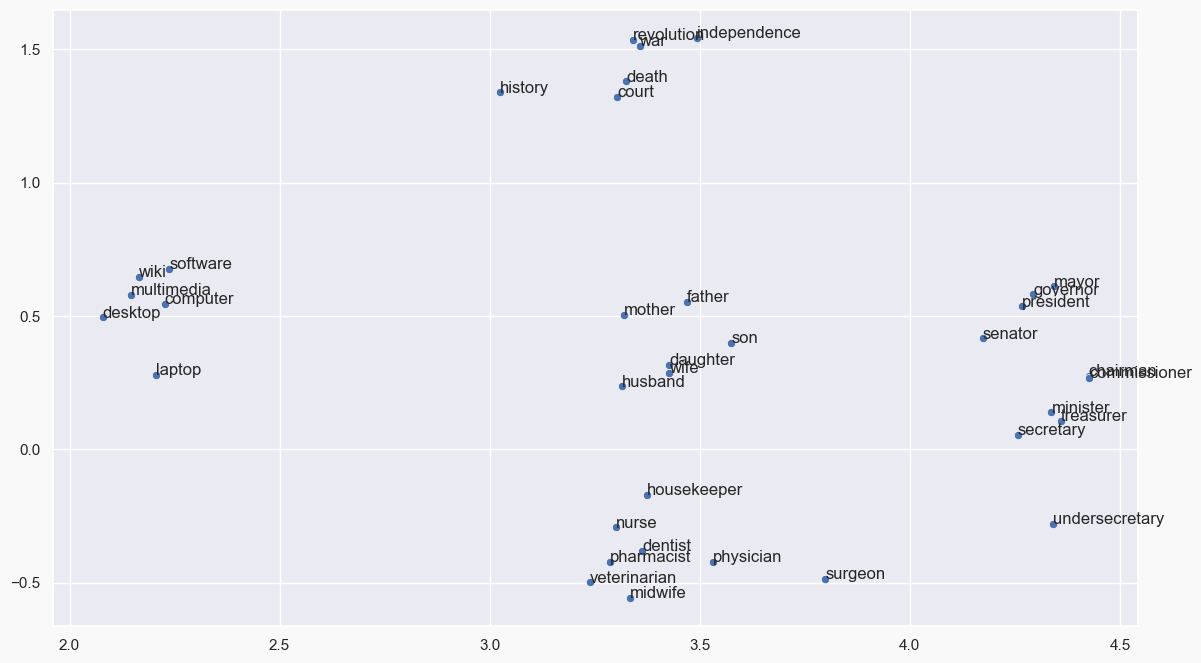

In [12]:
from sklearn.manifold import TSNE
# graphics
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# retrieve the word representation
word_vectors = []
for word in words_plus_neighbors:
    if word in words:
        idx = words.index(word)
        word_vectors.append(vectors[idx])
word_vectors = np.array(word_vectors)
# create the tSNE transform
tsne = TSNE(n_components=2, random_state=42)

# fit and transform the word vectors, store in T
T = tsne.fit_transform(word_vectors)

# plot
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')

sns.set(rc={'figure.figsize':(14, 8)})
sns.set(font_scale=1)

sns.scatterplot(x=T[:, 0], y=T[:, 1])

for label, x, y in zip(words_plus_neighbors, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')



### Semantic arithmetic with Word2Vec

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.


We will use a Word2Vec model pre-trained on the French Wac corpus.  This model has been trained on a corpus of 1 billion French words. 

This embedding is available in 2 formats:
- a text format for easy exploration of the model :
    - frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt)
- a binary format that can be loaded using the Gensim library: 
    - [enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)

Download the text file onto your machine to analyse it.

#### Question: 
>* Add the file to your .gitignore
>* Give the size in Mb of the embedding files
>* By exploring the contents of the embedding file in text format, give the number of words for which this model provides embeddings and the size of the embedding for each word.



YOUR ANSWER HERE

#### Word similarity

We are now going to use the [Gensim] library (https://radimrehurek.com/gensim/) to load the Word2Vec model and use it. 

#### Question: 
>* Modify the following code to load the Word2Vec template file in binary format using [load_word2vec](https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors)
>* Choose a couple of words and find the closest words according to the model using [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)
>* To guess the meaning of the words ‘yokohama’, ‘kanto’ and ‘shamisen’, look for their nearest neighbours. Explain the results.


In [ ]:
from gensim.models import KeyedVectors

## YOUR CODE HERE
embedding_file ="data/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, unicode_errors="ignore")
## YOUR CODE HERE
model.most_similar("chevalier")

#### Semantic arithmetic

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.

#### Question: 
>* using the function [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) specifying the arguments `positive` for the vectors to be added and `negative` for the vectors to be subtracted, check the relationship *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.
>* Using the same method, find XXX in the following semantic relations
>   * Paris is to France what XXX is to Japan.
>   * Chevalier is to France what XXX is to Japan.

In [14]:
import gensim.downloader as api
from gensim.models import KeyedVectors

# Load the Google News model using gensim's downloader
model = api.load("word2vec-google-news-300")  # This automatically downloads the model if needed

# 1. Verify the classic analogy: king - man + woman = queen
result_king = model.most_similar(positive=['king', 'woman'], negative=['man'])
print("Result for king - man + woman:", result_king)

# 2. Find the word for the analogy: Paris is to France what XXX is to Japan.
result_paris = model.most_similar(positive=['Paris', 'Japan'], negative=['France'])
print("Paris is to France what XXX is to Japan:", result_paris)

# 3. Find the word for the analogy: Chevalier is to France what XXX is to Japan.
result_chevalier = model.most_similar(positive=['Chevalier', 'Japan'], negative=['France'])
print("Chevalier is to France what XXX is to Japan:", result_chevalier)


01:50:26 INFO:Creating /Users/suzie/gensim-data


[==================================================] 100.0% 1662.8/1662.8MB downloaded


01:53:38 INFO:word2vec-google-news-300 downloaded
01:53:38 INFO:loading projection weights from /Users/suzie/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
01:53:54 INFO:KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /Users/suzie/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2025-02-21T13:53:54.481545', 'gensim': '4.3.3', 'python': '3.10.12 (main, Dec 22 2024, 15:24:48) [Clang 15.0.0 (clang-1500.1.0.2.5)]', 'platform': 'macOS-14.2.1-arm64-arm-64bit', 'event': 'load_word2vec_format'}


Result for king - man + woman: [('queen', 0.7118192911148071), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]
Paris is to France what XXX is to Japan: [('Tokyo', 0.8142861723899841), ('Toyko', 0.6596698760986328), ('Osaka', 0.6350962519645691), ('Nagoya', 0.6258591413497925), ('Seoul', 0.6054927110671997), ('Japanese', 0.5919331908226013), ('Yokohama', 0.5900902152061462), ('Osaka_Japan', 0.5859751105308533), ('Takamatsu', 0.5791837573051453), ('Fukuoka', 0.5664029121398926)]
Chevalier is to France what XXX is to Japan: [('Tanaka', 0.559235692024231), ('Okamoto', 0.5515652298927307), ('Yamada', 0.5467891693115234), ('Yamashita', 0.5367355942726135), ('Ishii', 0.5341945290565491), ('Okumura', 0.5329869985580444), ('Hirano', 0.5272975

## Contextual embeddings with BERT 

BERT was one of the first freely available Transformer language models, trained on large corpora. Many other models are available on HuggingFace.

As BERT is a contextual model, it is necessary to have it predict whole sentences in order to study the word embeddings it produces. In this section, we will compare the embeddings obtained for polysemous words according to the sentence in which they are used.

In English, *plant* has two meanings: plant and vegetable. With a non-contextual embedding, such as Glove or Colobert, these two meanings of the word plus are associated with an identical embedding. With BERT, we'll see that the same word can have several embeddings depending on the context.

First, load the BERT model and tokenizer from HuggingFace : 

In [20]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Load pre-trained model 
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # to access the hidden states
                                  )
# set the model to "evaluation" mode
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

### Tokenizer

Language models are trained with a specific breakdown of sentences into tokens. These tokens can be words or parts of words. It is necessary to use the tokenizer corresponding to each model.

tokenizer.vocab.keys() gives the list of all the tokens known for the language model. 

#### Question
>* How many different tokens are known to the BERT tokenizer?
>* Display a hundred tokens at random. What do you find?

In [18]:
import random
# Get the list of tokens from the vocabulary
tokens = list(tokenizer.vocab.keys())
num_tokens = len(tokens)
print("Number of tokens in BERT vocabulary:", num_tokens)

# Display 100 tokens at random
random_tokens = random.sample(tokens, 100)
print("Random sample of 100 tokens:")
print(random_tokens)

Number of tokens in BERT vocabulary: 30522
Random sample of 100 tokens:
['loaded', 'vidhan', '囗', 'killer', 'pointe', '##kic', 'ambient', '1777', '##cript', 'cylinders', 'revenues', 'tolerated', 'heartbeat', '##oya', '##mora', 'এ', 'hadley', 'narrowly', 'farrell', 'executive', 'troop', 'concession', 'stalk', '##₅', '##ison', 'unchanged', 'defective', 'earnest', 'knox', 'quad', 'writing', '##yne', '##islav', 'fascist', 'victory', 'pac', 'succeeds', '##gam', '##bm', 'synthetic', '1951', '##mos', 'curt', 'anglican', 'accompanying', 'abilities', 'expanse', '##ulous', '##bius', '##sus', 'prussia', '樹', 'smaller', '##lham', 'classify', 'reached', 'leaped', 'lifestyle', 'pod', '##rzy', 'relativity', 'contributing', 'rubin', 'doncaster', '##ful', 'synthesizer', 'epilogue', '[unused157]', 'david', '##ak', '##tori', 'irish', 'serbian', '1966', 'osborn', 'guerrero', 'dunkirk', 'affairs', '[unused18]', 'pink', '490', 'baths', '##ures', 'belt', 'fifteen', '##เ', 'apartment', 'zach', 'longer', 'desc

The tokenizer splits sentences and transforms the elements (words or sub-words) into clues. 

BERT can process several sentences, but you need to tell it how the sentences (segments) have been split, with an index: 0 for the first sentence, 1 for the second. 

Two specific tokens must also be added: 
* [CLS], a specific token used for sentence classification
* [SEP], the end of sentence token.

#### Question
>* Apply the bert_tokenize function to the 3 phases and keep the 3 vectors (index, token, segment).
>* Display this information for each of the sentences and check that the word *plant* has the same token index in the two sentences in which it appears.

In [19]:
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."


def bert_tokenize(snt):
    """ Apply the BERT tokenizer to a list of words representing a sentence
        and return 3 lists: 
        - list of token indx
        - list of token for debugging, not used by the BERT model
        - list of sentence index
        """
    # Add the special tokens.
    tagged_snt = "[CLS] " + snt + " [SEP]" 
    # Tokenize
    tokenized_snt = tokenizer.tokenize(tagged_snt)
    # convert tokens to indices
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)
    # mark the words in sentence.
    segments_ids = [1] * len(tokenized_snt)

    return (indexed_snt, tokenized_snt, segments_ids)

# Tokenize the sentences.
indices1, tokens1, segments1 = bert_tokenize(snt1)
indices2, tokens2, segments2 = bert_tokenize(snt2)
indices3, tokens3, segments3 = bert_tokenize(snt3)

# Display the tokenization details for each sentence.
print("Sentence 1:")
print("Tokens: ", tokens1)
print("Indices:", indices1)
print("Segments:", segments1)
print("\nSentence 2:")
print("Tokens: ", tokens2)
print("Indices:", indices2)
print("Segments:", segments2)
print("\nSentence 3:")
print("Tokens: ", tokens3)
print("Indices:", indices3)
print("Segments:", segments3)
print("\n")

# Locate the token "plant" in sentence 1 and sentence 3.
positions_snt1 = [i for i, token in enumerate(tokens1) if token == "plant"]
positions_snt3 = [i for i, token in enumerate(tokens3) if token == "plant"]

print("Positions of 'plant' in Sentence 1 tokens:", positions_snt1)
print("Positions of 'plant' in Sentence 3 tokens:", positions_snt3)

# Get the vocabulary index for 'plant' using the tokenizer.
vocab_index_plant = tokenizer.convert_tokens_to_ids("plant")
print("Vocabulary index for 'plant':", vocab_index_plant)

# Check that the token indices at these positions match the vocabulary index.
for pos in positions_snt1:
    print(f"Sentence 1 - Token index for 'plant' at position {pos}: {indices1[pos]}")
for pos in positions_snt3:
    print(f"Sentence 3 - Token index for 'plant' at position {pos}: {indices3[pos]}")



Sentence 1:
Tokens:  ['[CLS]', 'the', 'plant', 'has', 'reached', 'its', 'maximal', 'level', 'of', 'production', '.', '[SEP]']
Indices: [101, 1996, 3269, 2038, 2584, 2049, 29160, 2504, 1997, 2537, 1012, 102]
Segments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Sentence 2:
Tokens:  ['[CLS]', 'the', 'cars', 'are', 'assembled', 'inside', 'the', 'factory', '.', '[SEP]']
Indices: [101, 1996, 3765, 2024, 9240, 2503, 1996, 4713, 1012, 102]
Segments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Sentence 3:
Tokens:  ['[CLS]', 'a', 'plant', 'needs', 'sunlight', 'and', 'water', 'to', 'grow', 'well', '.', '[SEP]']
Indices: [101, 1037, 3269, 3791, 9325, 1998, 2300, 2000, 4982, 2092, 1012, 102]
Segments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Positions of 'plant' in Sentence 1 tokens: [2]
Positions of 'plant' in Sentence 3 tokens: [2]
Vocabulary index for 'plant': 3269
Sentence 1 - Token index for 'plant' at position 2: 3269
Sentence 3 - Token index for 'plant' at position 2: 3269


## Inference

To calculate embeddings, we need to make a prediction using the BERT model on a complete sentence. The *predict_hidden* function converts the token and segment index lists into a pytorch tensor and applies the model. 

The model used is a 12-layer model. We will use the last hidden layer of the model as an embedding to represent the words. Other solutions are possible, such as concatenation or averaging of several layers.


#### Question
>* Apply the model to each of the 3 sentences and store the resulting embeddings (tensors).
>* Display the dimension of the resulting tensors. What is the dimension of the embedding vector for each word?

In [26]:

def predict_hidden(indexed_snt, segments_ids):
    """Apply the BERT model to the input token indices and segment indices
        and return the last hidden layer
    """
    with torch.no_grad():
        # Convert inputs to PyTorch tensors
        tokens_tensor = torch.tensor([indexed_snt])
        segments_tensors = torch.tensor([segments_ids])
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
        one_hidden_layer = hidden_states[12][0]
        
    return one_hidden_layer

# Apply the model to each sentence to get the embeddings.
embedding1 = predict_hidden(indices1, segments1)
embedding2 = predict_hidden(indices2, segments2)
embedding3 = predict_hidden(indices3, segments3)

# Display the dimension of the resulting tensors.
# Each word (or token) is represented by a 768-dimensional embedding vector.
# For example, if Sentence 1 has 12 tokens, embedding1.shape will be (12, 768).
print("Embedding dimensions for Sentence 1:", embedding1.shape)
print("Embedding dimensions for Sentence 2:", embedding2.shape)
print("Embedding dimensions for Sentence 3:", embedding3.shape)

Embedding dimensions for Sentence 1: torch.Size([12, 768])
Embedding dimensions for Sentence 2: torch.Size([10, 768])
Embedding dimensions for Sentence 3: torch.Size([12, 768])


The hidden layer returned by the *predict_hidden* function is a tensor containing a context vector representing each token in the input sentence. We can use this vector to represent the meaning of this word as a function of its context. We're going to compare the representation of the polysemous word *plant* as a function of its context.

#### Question
>* Using the [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), calculate the following distances:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal) 
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 2 
> distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 2 
> How can we interpret these distances?

In [27]:
from scipy.spatial.distance import cosine

# Identify token positions.
plant_pos_snt1 = positions_snt1[0]       # "plant" in Sentence 1 (industrial meaning)
plant_pos_snt3 = positions_snt3[0]       # "plant" in Sentence 3 (vegetal meaning)
factory_pos_snt2 = [i for i, token in enumerate(tokens2) if token == "factory"][0]
production_pos_snt1 = [i for i, token in enumerate(tokens1) if token == "production"][0]

# Calculate cosine distances.
# Distance between "plant" in Sentence 1 and "plant" in Sentence 3.
distance_plant1_plant3 = cosine(embedding1[plant_pos_snt1].numpy(), embedding3[plant_pos_snt3].numpy())

# Distance between "plant" in Sentence 1 and "factory" in Sentence 2.
distance_plant1_factory = cosine(embedding1[plant_pos_snt1].numpy(), embedding2[factory_pos_snt2].numpy())

# Distance between "plant" in Sentence 1 and "production" in Sentence 1.
distance_plant1_production = cosine(embedding1[plant_pos_snt1].numpy(), embedding1[production_pos_snt1].numpy())

# Distance between "plant" in Sentence 3 and "production" in Sentence 1.
distance_plant3_production = cosine(embedding3[plant_pos_snt3].numpy(), embedding1[production_pos_snt1].numpy())

# Display the computed distances.
print("Cosine distance between 'plant' (Sentence 1) and 'plant' (Sentence 3):", distance_plant1_plant3)
print("Cosine distance between 'plant' (Sentence 1) and 'factory' (Sentence 2):", distance_plant1_factory)
print("Cosine distance between 'plant' (Sentence 1) and 'production' (Sentence 1):", distance_plant1_production)
print("Cosine distance between 'plant' (Sentence 3) and 'production' (Sentence 1):", distance_plant3_production)


Cosine distance between 'plant' (Sentence 1) and 'plant' (Sentence 3): 0.49866298063591274
Cosine distance between 'plant' (Sentence 1) and 'factory' (Sentence 2): 0.31225686446735756
Cosine distance between 'plant' (Sentence 1) and 'production' (Sentence 1): 0.24017340781452223
Cosine distance between 'plant' (Sentence 3) and 'production' (Sentence 1): 0.6200194243670669


Interpretation:
Lower cosine distances indicate higher similarity between the context-dependent embeddings.
For instance, if the distance between "plant" (Sentence 1) and "production" is low,
it suggests that the industrial sense of "plant" is semantically close to "production".
Conversely, a higher distance between "plant" (industrial) and "plant" (vegetal) would indicate a divergence in meaning based on context.